Task 3: Customer Segmentation / Clustering 
Perform customer segmentation using clustering techniques. Use both profile information 
(from Customers.csv) and transaction information (from Transactions.csv). 
● You have the flexibility to choose any clustering algorithm and any number of clusters in 
between(2 and 10)  
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this). 
● Visualise your clusters using relevant plots. 
Deliverables: 
● A report on your clustering results, including: 
○ The number of clusters formed. 
○ DB Index value. 
○ Other relevant clustering metrics. 
● A Jupyter Notebook/Python script containing your clustering code. 
Evaluation Criteria: 
● Clustering logic and metrics. 
● Visual representation of clusters.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [15]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [17]:
# Merging transaction and customer data to create a customer transaction profile
customer_transactions = transactions.groupby('CustomerID').agg(
    total_value=('TotalValue', 'sum'),
    purchase_frequency=('TransactionID', 'nunique'),
    average_transaction_value=('TotalValue', 'mean'),
    recency=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days)
).reset_index()

In [19]:
# Merging with customer profile data
customer_profile = pd.merge(customers, customer_transactions, on='CustomerID')

In [21]:
# Scaling the features for clustering
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile[['total_value', 'purchase_frequency', 'average_transaction_value', 'recency']])

In [23]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=42) 
customer_profile['cluster'] = kmeans.fit_predict(customer_profile_scaled)

E:\AnacondaPython\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
# Evaluating Clustering using DB Index
db_index = davies_bouldin_score(customer_profile_scaled, customer_profile['cluster'])
print(f"DB Index: {db_index}")

DB Index: 1.0914590446536387


In [27]:
# Visualizing the Clusters
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
customer_profile_pca = pca.fit_transform(customer_profile_scaled)

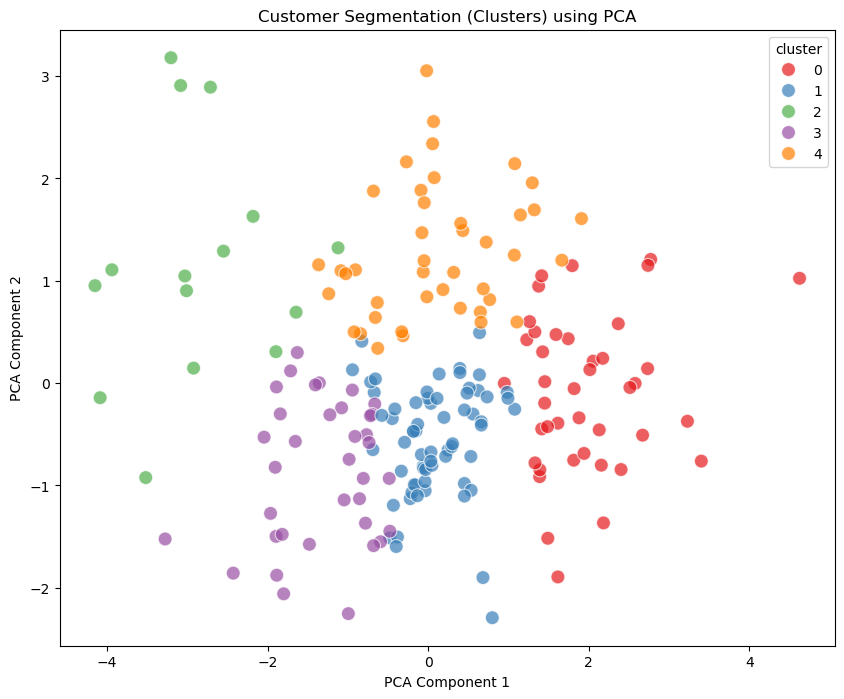

In [29]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=customer_profile_pca[:, 0], y=customer_profile_pca[:, 1], hue=customer_profile['cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation (Clusters) using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [31]:
# Analyzing the clusters (Optional)
# You can analyze the clusters by examining the cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['total_value', 'purchase_frequency', 'average_transaction_value', 'recency'])
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
   total_value  purchase_frequency  average_transaction_value   recency
0     1.404548            1.356650                   0.328063 -0.459111
1    -0.115779            0.255147                  -0.384160 -0.299193
2    -1.321025           -1.501176                  -0.448526  2.588097
3    -1.066698           -0.796853                  -0.927217 -0.309175
4     0.194183           -0.500068                   1.229227  0.251903


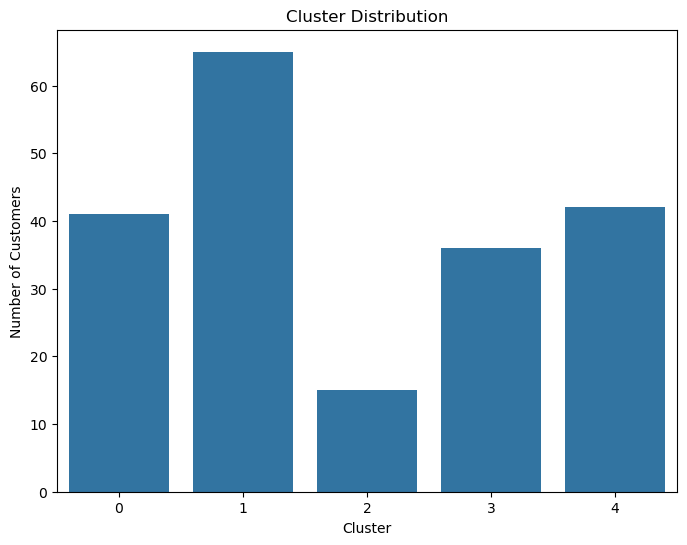

In [33]:
# Cluster size distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=customer_profile)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
